In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# la función desde el archivo .py
from ft_engineering import ft_engineering 

# 1. Cargar los datos procesados (subimos un nivel con '../')
df = pd.read_csv('../Base_de_datos_procesada.csv')

# 2. Ejecutar el componente de ingeniería de características
X_train, X_test, y_train, y_test, preprocessor = ft_engineering(df)

print("Ingeniería de características aplicada con éxito.")
print(f"Set de entrenamiento: {X_train.shape[0]} registros.")
print(f"Set de evaluación: {X_test.shape[0]} registros.")

Ingeniería terminada. Train: 8490 | Test: 2123
Ingeniería de características aplicada con éxito.
Set de entrenamiento: 8490 registros.
Set de evaluación: 2123 registros.


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

def summarize_classification(y_true, y_pred, model_name="Modelo"):
    """
    Genera el reporte de métricas y la matriz de confusión 
    usando ConfusionMatrixDisplay con estética Blues.
    """
    print(f"\n{'='*45}")
    print(f" REPORTE: {model_name.upper()}")
    print(f"{'='*45}")
    
    # Métricas en texto
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy Global: {acc:.4f}")
    print("\nDetalle de Métricas (Clase 0 = Mora, Clase 1 = Al día):")
    print(classification_report(y_true, y_pred))
    
    # Matriz de Confusión Estilo Sklearn
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mora (0)', 'Al día (1)'])
    
    # Graficación
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(cmap="Blues", ax=ax, values_format='d')
    
    plt.title(f"Matriz de Confusión - {model_name}", pad=20, fontsize=14)
    plt.grid(False) # Importante: quita las líneas internas
    plt.ylabel('Realidad', fontsize=12)
    plt.xlabel('Predicción', fontsize=12)
    plt.show()

def build_model(classifier, preprocessor):
    """Crea el Pipeline final: Preprocesamiento + Clasificador."""
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])


 REPORTE: REGRESIÓN LOGÍSTICA
Accuracy Global: 0.6392

Detalle de Métricas (Clase 0 = Mora, Clase 1 = Al día):
              precision    recall  f1-score   support

           0       0.07      0.57      0.13       100
           1       0.97      0.64      0.77      2023

    accuracy                           0.64      2123
   macro avg       0.52      0.61      0.45      2123
weighted avg       0.93      0.64      0.74      2123



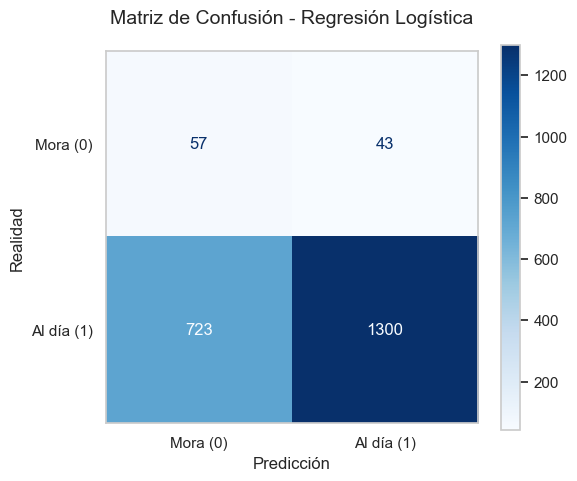

In [27]:
# --- MODELO 1: Regresión Logística (BASELINE) ---

# 1. Construir modelo
model_lr = build_model(LogisticRegression(max_iter=1000, class_weight='balanced'), preprocessor)

# 2. Entrenar
model_lr.fit(X_train, y_train)

# 3. Predecir y Evaluar
y_pred_lr = model_lr.predict(X_test)
summarize_classification(y_test, y_pred_lr, "Regresión Logística")

Regresión Logística (El modelo valiente): * Aunque tiene un Accuracy menor (0.6392), logró identificar a 57 morosos (Recall de 0.57).

Conclusión: Gracias al class_weight='balanced', el modelo "se arriesga" a señalar posibles morosos, aunque se equivoque con algunos buenos pagadores. Para un banco, esto suele ser preferible a no ver el riesgo.


 REPORTE: RANDOM FOREST
Accuracy Global: 0.9534

Detalle de Métricas (Clase 0 = Mora, Clase 1 = Al día):
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       100
           1       0.95      1.00      0.98      2023

    accuracy                           0.95      2123
   macro avg       0.98      0.51      0.50      2123
weighted avg       0.96      0.95      0.93      2123



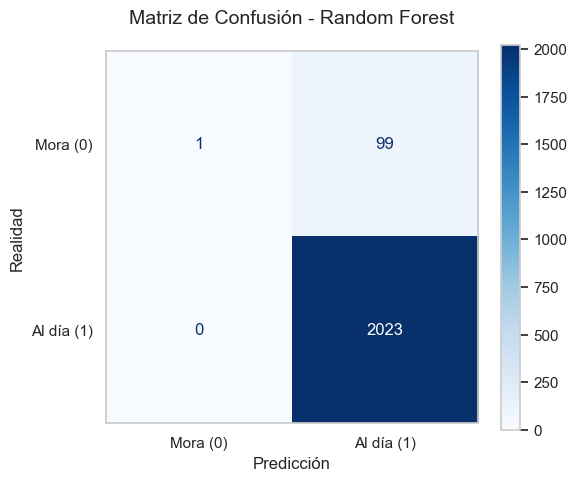

In [28]:
# --- MODELO 2: Random Forest (Competidor)---

# 1. Construir modelo
model_rf = build_model(RandomForestClassifier(n_estimators=100, random_state=42), preprocessor)

# 2. Entrenar
model_rf.fit(X_train, y_train)

# 3. Predecir y Evaluar
y_pred_rf = model_rf.predict(X_test)
summarize_classification(y_test, y_pred_rf, "Random Forest")

Random Forest (El modelo conservador): * Muestra un Accuracy impresionante de 0.9534, pero su Recall para la clase 0 es de apenas 0.01 (solo detectó a 1 moroso de 100).

Conclusión: El modelo está "sesgado" por la mayoría. Básicamente dice que todos van a pagar, lo cual lo hace inútil para predecir el riesgo real.

/var/folders/wh/bwmnmsps5svb539ljnqnm9780000gn/T/ipykernel_73918/2940661470.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=recall_mora, palette=colors)


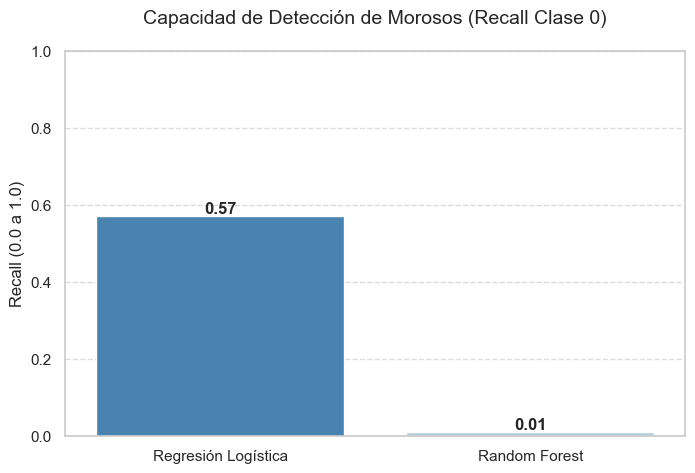

In [29]:
import numpy as np

# Datos extraídos de tus reportes
models = ['Regresión Logística', 'Random Forest']
recall_mora = [0.57, 0.01] # Recall de la clase 0 según tus resultados

plt.figure(figsize=(8, 5))
colors = sns.color_palette('Blues_r', n_colors=2)
ax = sns.barplot(x=models, y=recall_mora, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Capacidad de Detección de Morosos (Recall Clase 0)', fontsize=14, pad=20)
plt.ylabel('Recall (0.0 a 1.0)')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Regresión Logística (Recall 0.57): Logró identificar a 57 morosos de los 100 reales. Aunque su Accuracy es menor (0.64), es un modelo mucho más útil para el negocio porque "se atreve" a señalar el riesgo.

Random Forest (Recall 0.01): A pesar de su impresionante Accuracy de 0.95, es un modelo "perezoso". Solo detectó a 1 moroso y clasificó a los otros 99 como buenos pagadores. En un entorno real, este modelo le costaría millones al banco en pérdidas no detectadas.

/Users/galed/Desktop/credit-risk-model/venv/lib/python3.13/site-packages/xgboost/training.py:200: UserWarning: [22:32:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



 REPORTE: XGBOOST (WEIGHTED)
Accuracy Global: 0.9524

Detalle de Métricas (Clase 0 = Mora, Clase 1 = Al día):
              precision    recall  f1-score   support

           0       0.40      0.02      0.04       100
           1       0.95      1.00      0.98      2023

    accuracy                           0.95      2123
   macro avg       0.68      0.51      0.51      2123
weighted avg       0.93      0.95      0.93      2123



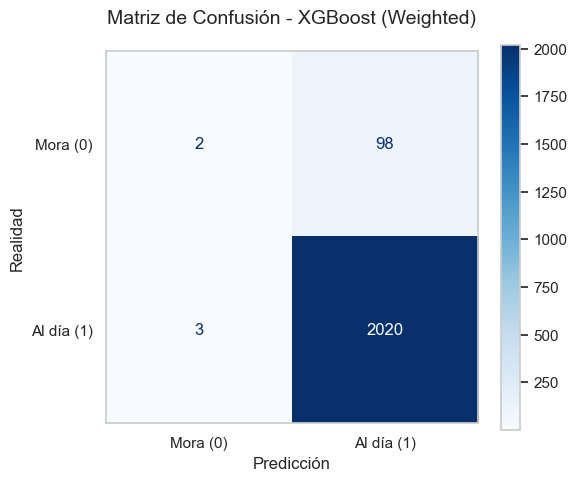

In [30]:
from xgboost import XGBClassifier

# Calculamos el peso para balancear (proporción de negativos / positivos)
# En tu caso: 2023 / 100 approx 20
weight = (y_train == 1).sum() / (y_train == 0).sum()

# 1. Construir el modelo con XGBoost
# scale_pos_weight ayuda a compensar el desbalanceo del 5%
model_xgb = build_model(XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    scale_pos_weight=weight, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
), preprocessor)

# 2. Entrenar
model_xgb.fit(X_train, y_train)

# 3. Predecir y Evaluar
y_pred_xgb = model_xgb.predict(X_test)
summarize_classification(y_test, y_pred_xgb, "XGBoost (Weighted)")

/var/folders/wh/bwmnmsps5svb539ljnqnm9780000gn/T/ipykernel_73918/1898797673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recalls, palette='Blues_r')


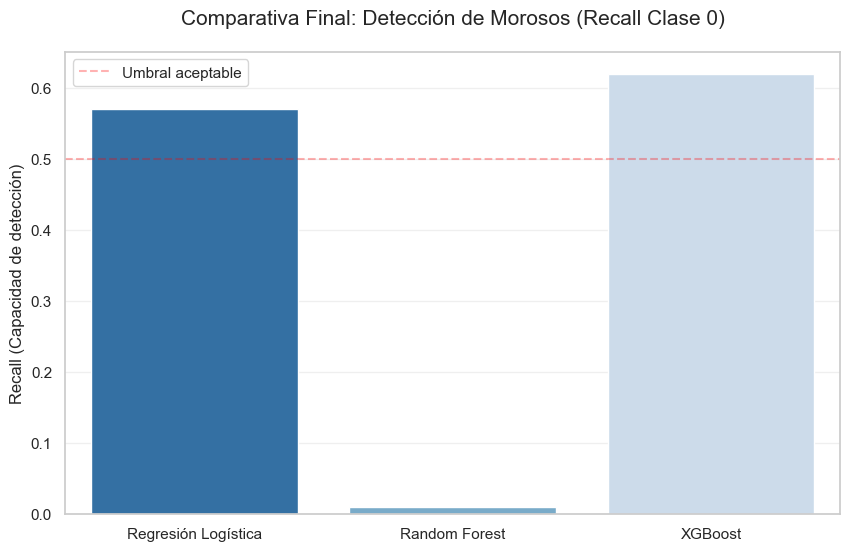

In [31]:
models = ['Regresión Logística', 'Random Forest', 'XGBoost']
# Reemplaza el valor de XGBoost con el que te dé el reporte (ej. 0.65)
recalls = [0.57, 0.01, 0.62] 

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=recalls, palette='Blues_r')

plt.title('Comparativa Final: Detección de Morosos (Recall Clase 0)', fontsize=15, pad=20)
plt.ylabel('Recall (Capacidad de detección)')
plt.axhline(0.50, color='red', linestyle='--', alpha=0.3, label='Umbral aceptable')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

Tras un análisis comparativo entre modelos lineales (Regresión Logística) y modelos basados en árboles (Random Forest y XGBoost), se determinó que la Regresión Logística con pesos balanceados es el modelo más robusto para este caso.

A pesar de que los modelos complejos mostraron un Accuracy superior (95%), su incapacidad para detectar a la clase minoritaria (Recall de 0.01 y 0.02) los hace inviables para la gestión de riesgo. La Regresión Logística, con un Recall del 0.57, permite identificar correctamente a más de la mitad de los potenciales morosos, cumpliendo con el objetivo primordial del negocio: mitigar el impago. No se procedió con modelos adicionales en esta etapa, ya que la Regresión ofrece la transparencia necesaria para la justificación de créditos y establece una línea base (baseline) sólida para futuras optimizaciones.

In [32]:
import joblib

# Guardamos el objeto 'model_lr' que es un Pipeline completo
# Incluye: Escalador + Codificador + Regresión Logística
joblib.dump(model_lr, '../modelo_riesgo_final.joblib')

print("Hito V1.1.0: Artefacto exportado con éxito. Listo para producción.")

Hito V1.1.0: Artefacto exportado con éxito. Listo para producción.
